## Bike Sharing Assignment

###  Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
bikes = pd.read_csv("day.csv")

In [4]:
# Let's take a look at the first few rows
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
# Summary of the dataset: 730 rows, 16 columns, no null values
print(bikes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [6]:
# Shape of the dataset
bikes.shape

(730, 16)

In [7]:
# Summary of numeric cols
bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Data Cleaning

In [8]:
#Lets start with season
bikes['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
#(1:spring, 2:summer, 3:fall, 4:winter)
def ass_season(x):
    return x.map({
        1:'Spring',
        2:'Summer',
        3:'Fall',
        4:'Winter'        
    })
bikes[['season']] = bikes[['season']].apply(ass_season)

In [10]:
bikes['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [11]:
#yr(0:2018,1:2019)
def ass_yr(x):
    return x.map({
        0:'2018',
        1:'2019'        
    })
bikes[['yr']] = bikes[['yr']].apply(ass_yr)

In [12]:
bikes['yr'].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [13]:
# mnth month ( 1 to 12)
def ass_mnth(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'        
    })
bikes[['mnth']] = bikes[['mnth']].apply(ass_mnth)

In [14]:
bikes['mnth'].value_counts()

Oct    62
Dec    62
Jan    62
May    62
Aug    62
Jul    62
Mar    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [15]:
#Converting holiday into object type
bikes['holiday'] = bikes['holiday'].astype('object')

In [16]:
#weekday(day of the week) 
def ass_weekday(x):
    return x.map({
        0:'Sun',
        1:'Mon',
        2:'Tue',
        3:'Wed',
        4:'Thu',
        5:'Fri',
        6:'Sat'        
    })
bikes[['weekday']] = bikes[['weekday']].apply(ass_weekday)

In [17]:
bikes['weekday'].value_counts()

Mon    105
Tue    105
Sat    104
Fri    104
Wed    104
Sun    104
Thu    104
Name: weekday, dtype: int64

In [18]:
# Converting workingday as object type
bikes['workingday'] = bikes['workingday'].astype('object')

In [19]:
# weathersit (1: Clear , 2: Mist, 3: Light Snow, 4: Heavy Rain)
def ass_weather(x):
    return x.map({
        1:'Clear',
        2:'Mist',
        3:'Light Snow',
        4:'Heavy Rain'        
    })
bikes[['weathersit']] = bikes[['weathersit']].apply(ass_weather)

In [20]:
bikes['weathersit'].value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [21]:
bikes.head(10)

instant      dteday  season    yr mnth holiday weekday workingday  \
0        1  01-01-2018  Spring  2018  Jan       0     Mon          1   
1        2  02-01-2018  Spring  2018  Jan       0     Tue          1   
2        3  03-01-2018  Spring  2018  Jan       0     Wed          1   
3        4  04-01-2018  Spring  2018  Jan       0     Thu          1   
4        5  05-01-2018  Spring  2018  Jan       0     Fri          1   
5        6  06-01-2018  Spring  2018  Jan       0     Sat          0   
6        7  07-01-2018  Spring  2018  Jan       0     Sun          0   
7        8  08-01-2018  Spring  2018  Jan       0     Mon          1   
8        9  09-01-2018  Spring  2018  Jan       0     Tue          1   
9       10  10-01-2018  Spring  2018  Jan       0     Wed          1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       Mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       Mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   
5      Clear   8.378268  11.66045  51.8261   6.000868      88        1518   
6       Mist   8.057402  10.44195  49.8696  11.304642     148        1362   
7       Mist   6.765000   8.11270  53.5833  17.875868      68         891   
8      Clear   5.671653   5.80875  43.4167  24.250650      54         768   
9      Clear   6.184153   7.54440  48.2917  14.958889      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

In [22]:
bikes['dteday'] = bikes['dteday'].astype('datetime64')

In [23]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [24]:
# Now lets a look at the numerical columns again
bikes.describe()

instant        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000   20.319259   23.726322   62.765175   12.763620   
std    210.877136    7.506729    8.150308   14.237589    5.195841   
min      1.000000    2.424346    3.953480    0.000000    1.500244   
25%    183.250000   13.811885   16.889713   52.000000    9.041650   
50%    365.500000   20.465826   24.368225   62.625000   12.125325   
75%    547.750000   26.880615   30.445775   72.989575   15.625589   
max    730.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Data Visualization

In [25]:
bikes.describe().columns #numercial columns

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [26]:
num_col = ['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']

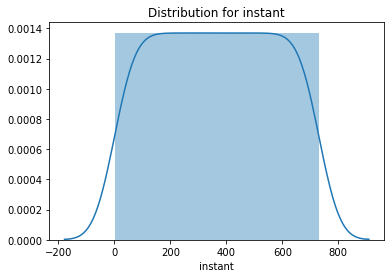

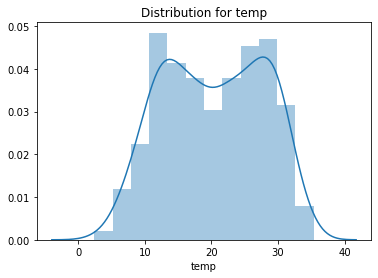

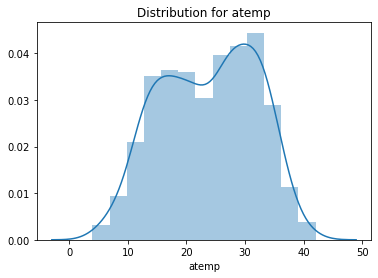

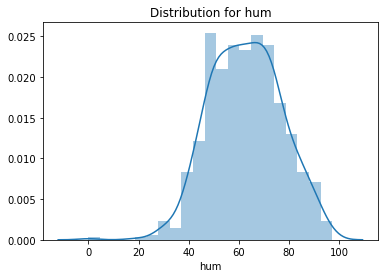

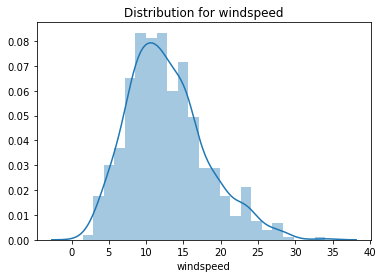

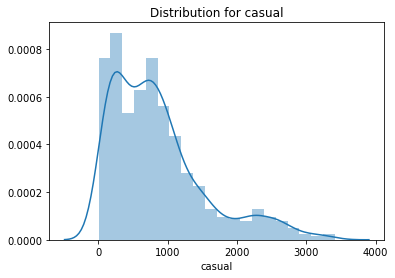

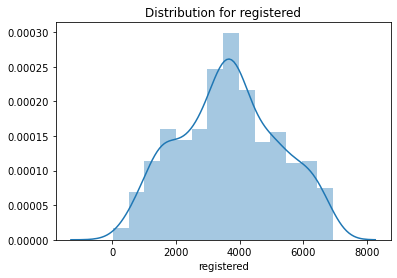

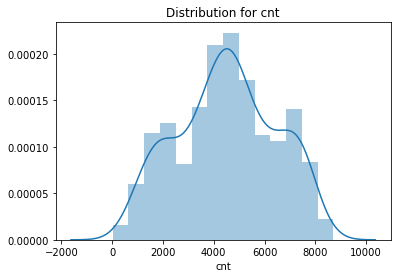

In [27]:
for col in num_col:
    sns.distplot(bikes[col])
    plt.title("Distribution for "+col)
    plt.show();
    print("========================================================")

*Observation from above distplots*
- temperature and feeling temperature have a bimodal distribution
- windspeed, humidity, registered and count of bikes have kind of a normal distribution.
- casual users distribution has a long tail

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [28]:
# All numeric (float and int) variables in the dataset
bikes_numeric = bikes.select_dtypes(include=['float64', 'int64'])
bikes_numeric.head()

instant       temp     atemp      hum  windspeed  casual  registered   cnt
0        1  14.110847  18.18125  80.5833  10.749882     331         654   985
1        2  14.902598  17.68695  69.6087  16.652113     131         670   801
2        3   8.050924   9.47025  43.7273  16.636703     120        1229  1349
3        4   8.200000  10.60610  59.0435  10.739832     108        1454  1562
4        5   9.305237  11.46350  43.6957  12.522300      82        1518  1600

Here, as you might notice, `instant` isn't of any use to building a linear regression model. Hence, we drop it.

In [29]:
# Dropping instant 
bikes_numeric = bikes_numeric.drop(['instant'], axis=1)
bikes_numeric.head()

temp     atemp      hum  windspeed  casual  registered   cnt
0  14.110847  18.18125  80.5833  10.749882     331         654   985
1  14.902598  17.68695  69.6087  16.652113     131         670   801
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 1440x720 with 0 Axes>

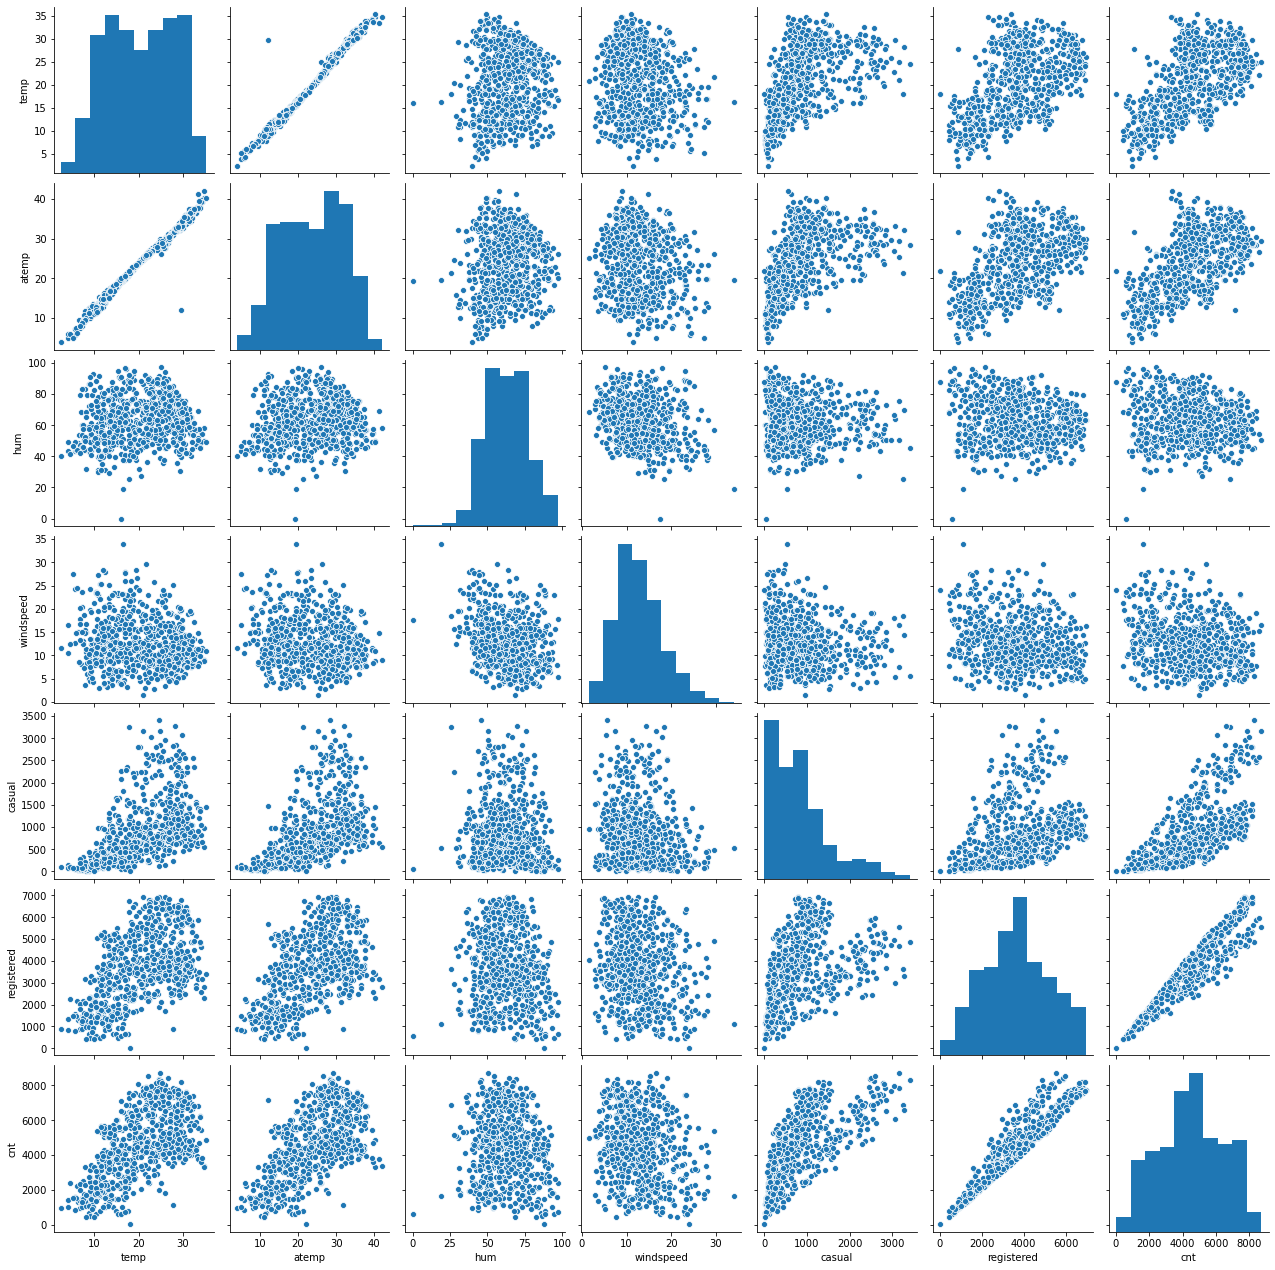

In [30]:
# Pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(bikes_numeric)
plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [31]:
# Correlation matrix
cor = bikes_numeric.corr()
cor

temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991696  0.128565  -0.158186  0.542731    0.539436   
atemp       0.991696  1.000000  0.141512  -0.183876  0.543362    0.543678   
hum         0.128565  0.141512  1.000000  -0.248506 -0.075211   -0.089212   
windspeed  -0.158186 -0.183876 -0.248506   1.000000 -0.167995   -0.217914   
casual      0.542731  0.543362 -0.075211  -0.167995  1.000000    0.394137   
registered  0.539436  0.543678 -0.089212  -0.217914  0.394137    1.000000   
cnt         0.627044  0.630685 -0.098543  -0.235132  0.672123    0.945411   

                 cnt  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
casual      0.672123  
registered  0.945411  
cnt         1.000000

Let's plot the correlations on a heatmap for better visualisation

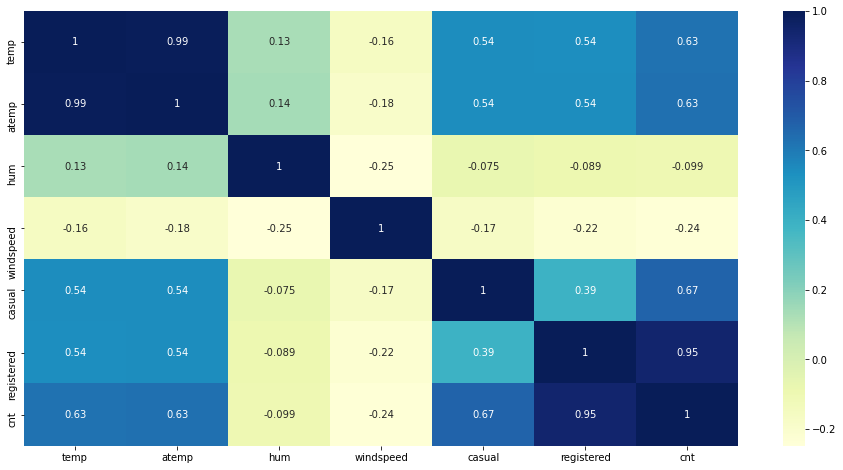

In [32]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of cnt with independent variables:
- Cnt is highly (positively) correlated with registered which is evident from the fact that registered users will hire the bike more oftenly.
- Cnt is postively correlated with temp, atemp and casual.

- Cnt is negatively correlated to ```hum``` and ```windspeed``` . This suggest that on windy day or on a humid day, people are less likely to hire a bike.

Correlation among independent variables:
- temp and atemp are highly positively correlated. 


Thus, while building the model, we'll have to pay attention to multicollinearity.

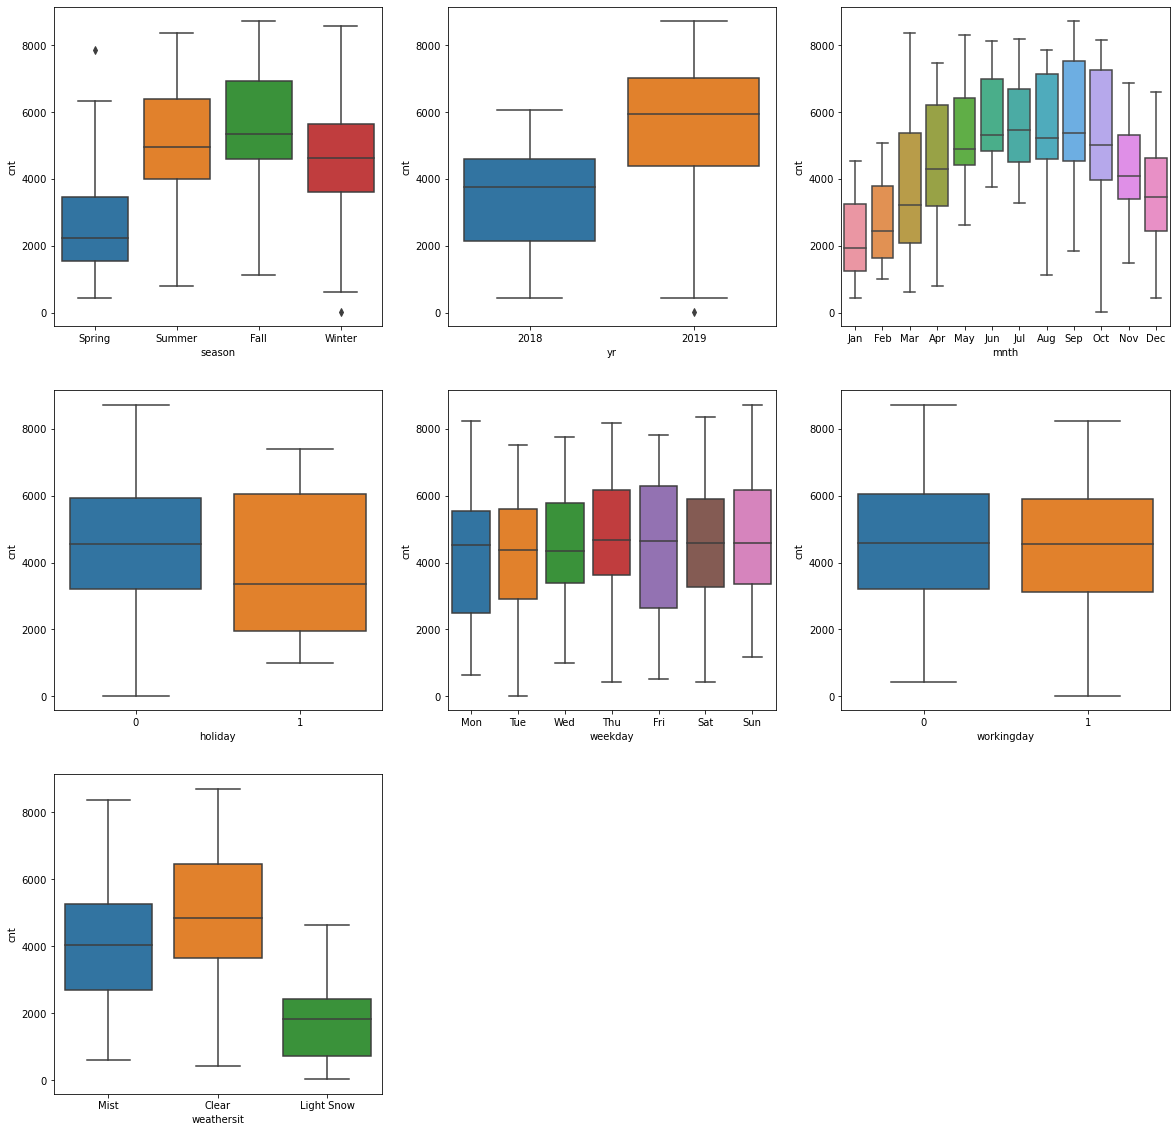

In [33]:
# Lets now visualize the catagorical variables
plt.figure(figsize=(20,20))
plt.subplot(3,3,1) 
sns.boxplot(x='season', y='cnt', data=bikes)
plt.subplot(3,3,2) 
sns.boxplot(x='yr', y='cnt', data=bikes)
plt.subplot(3,3,3) 
sns.boxplot(x='mnth', y='cnt', data=bikes)
plt.subplot(3,3,4) 
sns.boxplot(x='holiday', y='cnt', data=bikes)
plt.subplot(3,3,5) 
sns.boxplot(x='weekday', y='cnt', data=bikes)
plt.subplot(3,3,6) 
sns.boxplot(x='workingday', y='cnt', data=bikes)
plt.subplot(3,3,7) 
sns.boxplot(x='weathersit', y='cnt', data=bikes)
plt.show();

The boxplot also have some interesting insights:
- More number of people rented the bikes in Fall and Summer than compared to Winter and Spring. Same is evident from the month v/s count boxplot.
- In 2019 more number of bikes were rented as compared to 2018.
- Bikes were equally rented throughout the week.
- Working day does not have much effect bikes being rented.
- Type of weather also effects the bike renting as clear weather attracts more people rather than misty or light snow weather.

#### Data Preparation

Let's now prepare the data and build the model. First, let's take a look at the dataset again.

In [34]:
bikes.head()

instant     dteday  season    yr mnth holiday weekday workingday  \
0        1 2018-01-01  Spring  2018  Jan       0     Mon          1   
1        2 2018-02-01  Spring  2018  Jan       0     Tue          1   
2        3 2018-03-01  Spring  2018  Jan       0     Wed          1   
3        4 2018-04-01  Spring  2018  Jan       0     Thu          1   
4        5 2018-05-01  Spring  2018  Jan       0     Fri          1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       Mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       Mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [35]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

Let's now create dummy variables for the categorical variables

In [36]:
# Subset all categorical variables
bikes_categorical = bikes.select_dtypes(include=['object'])
bikes_categorical.head()

season    yr mnth holiday weekday workingday weathersit
0  Spring  2018  Jan       0     Mon          1       Mist
1  Spring  2018  Jan       0     Tue          1       Mist
2  Spring  2018  Jan       0     Wed          1      Clear
3  Spring  2018  Jan       0     Thu          1      Clear
4  Spring  2018  Jan       0     Fri          1      Clear

In [37]:
# Convert into dummies
bikes_dummies = pd.get_dummies(bikes_categorical, drop_first=True)
bikes_dummies.head()

season_Spring  season_Summer  season_Winter  yr_2019  mnth_Aug  mnth_Dec  \
0              1              0              0        0         0         0   
1              1              0              0        0         0         0   
2              1              0              0        0         0         0   
3              1              0              0        0         0         0   
4              1              0              0        0         0         0   

   mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  ...  holiday_1  weekday_Mon  \
0         0         1         0         0  ...          0            1   
1         0         1         0         0  ...          0            0   
2         0         1         0         0  ...          0            0   
3         0         1         0         0  ...          0            0   
4         0         1         0         0  ...          0            0   

   weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
0            0            0            0            0            0   
1            0            0            0            1            0   
2            0            0            0            0            1   
3            0            0            1            0            0   
4            0            0            0            0            0   

   workingday_1  weathersit_Light Snow  weathersit_Mist  
0             1                      0                1  
1             1                      0                1  
2             1                      0                0  
3             1                      0                0  
4             1                      0                0  

[5 rows x 25 columns]

In [38]:
# Drop categorical variable columns
bikes = bikes.drop(list(bikes_categorical.columns), axis=1)

In [39]:
# Concatenate dummy variables with main df
bikes = pd.concat([bikes, bikes_dummies], axis=1)

In [40]:
# Let's check the first few rows
bikes.head()

instant     dteday       temp     atemp      hum  windspeed  casual  \
0        1 2018-01-01  14.110847  18.18125  80.5833  10.749882     331   
1        2 2018-02-01  14.902598  17.68695  69.6087  16.652113     131   
2        3 2018-03-01   8.050924   9.47025  43.7273  16.636703     120   
3        4 2018-04-01   8.200000  10.60610  59.0435  10.739832     108   
4        5 2018-05-01   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  season_Spring  ...  holiday_1  weekday_Mon  weekday_Sat  \
0         654   985              1  ...          0            1            0   
1         670   801              1  ...          0            0            0   
2        1229  1349              1  ...          0            0            0   
3        1454  1562              1  ...          0            0            0   
4        1518  1600              1  ...          0            0            0   

   weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  workingday_1  \
0            0            0            0            0             1   
1            0            0            1            0             1   
2            0            0            0            1             1   
3            0            1            0            0             1   
4            0            0            0            0             1   

   weathersit_Light Snow  weathersit_Mist  
0                      0                1  
1                      0                1  
2                      0                0  
3                      0                0  
4                      0                0  

[5 rows x 34 columns]

Notice that the `instant` column is still there. We had dropped it from the 'bikes_numeric' dataframe but not from the original.
We dont need the `dteday` column for our model building as we already have weekday and weekend coluumns in our dataset.
Also we dont need `casual` and `registered` columns as their sum is already being captured in our target variable `cnt`.
Let's drop them now.

In [41]:
# Drop the irrelevant columns
bikes.drop('instant', axis = 1, inplace = True)
bikes.drop('dteday', axis = 1, inplace = True)
bikes.drop('casual', axis = 1, inplace = True)
bikes.drop('registered', axis = 1, inplace = True)

In [42]:
bikes.head()

temp     atemp      hum  windspeed   cnt  season_Spring  \
0  14.110847  18.18125  80.5833  10.749882   985              1   
1  14.902598  17.68695  69.6087  16.652113   801              1   
2   8.050924   9.47025  43.7273  16.636703  1349              1   
3   8.200000  10.60610  59.0435  10.739832  1562              1   
4   9.305237  11.46350  43.6957  12.522300  1600              1   

   season_Summer  season_Winter  yr_2019  mnth_Aug  ...  holiday_1  \
0              0              0        0         0  ...          0   
1              0              0        0         0  ...          0   
2              0              0        0         0  ...          0   
3              0              0        0         0  ...          0   
4              0              0        0         0  ...          0   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_Wed  workingday_1  weathersit_Light Snow  weathersit_Mist  
0            0             1                      0                1  
1            0             1                      0                1  
2            1             1                      0                0  
3            0             1                      0                0  
4            0             1                      0                0  

[5 rows x 30 columns]

###  Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [44]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=100)

In [45]:
df_train.shape

(510, 30)

In [46]:
df_test.shape

(219, 30)

### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [50]:
bikes_numeric.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

Notice we have already dropped `casual` and `registered` columns from this list. Lets scale the rest of the columns using StandardScaler.

In [51]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [52]:
# Let's take a look at the train dataframe now
df_train.head()

temp     atemp       hum  windspeed       cnt  season_Spring  \
653 -0.121335 -0.055878 -0.514725  -0.117752  1.562685              0   
576  1.231731  1.194106  0.516433  -0.330615  1.399629              0   
426 -0.420478 -0.348834 -0.069854  -0.385694 -0.215554              1   
728 -1.294913 -1.473492 -1.045032   2.018143 -1.379511              1   
482 -0.627580 -0.571474 -1.000840  -0.779889 -0.136589              0   

     season_Summer  season_Winter  yr_2019  mnth_Aug  ...  holiday_1  \
653              0              1        1         0  ...          0   
576              0              0        1         0  ...          0   
426              0              0        1         0  ...          0   
728              0              0        1         0  ...          0   
482              1              0        1         0  ...          0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
653            0            0            0            0            0   
576            0            0            0            0            0   
426            0            0            1            0            0   
728            1            0            0            0            0   
482            0            0            1            0            0   

     weekday_Wed  workingday_1  weathersit_Light Snow  weathersit_Mist  
653            1             1                      0                0  
576            1             1                      0                0  
426            0             0                      0                1  
728            0             1                      0                0  
482            0             0                      0                1  

[5 rows x 30 columns]

As expected, the variables have been appropriately scaled.

In [54]:
# Split the train dataset into X and y

y_train = df_train.pop('cnt')
X_train = df_train

### Building the first model with all the features

Let's now build our first model with all the features.

In [55]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [56]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.40249844  0.04389584 -0.1024697  -0.13694326 -0.19653619  0.18610293
  0.49240437  1.02923945  0.1026607  -0.20361459 -0.16569466 -0.28279303
 -0.15114077  0.00955734  0.00358811  0.11037447 -0.1850925   0.02639396
  0.38649992 -0.60277244 -0.10994264 -0.25096289 -0.22421366  0.01711851
 -0.11739846 -0.05012568 -0.27132453 -1.11823914 -0.26434138]
-0.18138058640350416


#### Model Building Using RFE

Now, we have close to 30 features. It is obviously not possible to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (20 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [60]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 20 features
lm = LinearRegression()
rfe1 = RFE(lm, 20)

# Fit with 20 features
rfe1.fit(X_train, y_train)

# Print the boolean results
list(zip(X_train.columns, rfe1.support_, rfe1.ranking_))

[('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 10),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('holiday_1', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 8),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 5),
 ('workingday_1', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

#### Model Building and Evaluation 

Let's now check the summary of this model using `statsmodels`.

In [61]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 20 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

const      temp       hum  windspeed  season_Spring  season_Summer  \
653    1.0 -0.121335 -0.514725  -0.117752              0              0   
576    1.0  1.231731  0.516433  -0.330615              0              0   
426    1.0 -0.420478 -0.069854  -0.385694              1              0   
728    1.0 -1.294913 -1.045032   2.018143              1              0   
482    1.0 -0.627580 -1.000840  -0.779889              0              1   

     season_Winter  yr_2019  mnth_Dec  mnth_Feb  ...  mnth_Jul  mnth_May  \
653              1        1         0         0  ...         0         0   
576              0        1         0         0  ...         1         0   
426              0        1         0         0  ...         0         0   
728              0        1         1         0  ...         0         0   
482              0        1         0         0  ...         0         0   

     mnth_Nov  mnth_Sep  holiday_1  weekday_Sat  weekday_Sun  workingday_1  \
653         0         0          0            0            0             1   
576         0         0          0            0            0             1   
426         0         0          0            0            1             0   
728         0         0          0            0            0             1   
482         0         0          0            0            1             0   

     weathersit_Light Snow  weathersit_Mist  
653                      0                0  
576                      0                0  
426                      0                1  
728                      0                0  
482                      0                1  

[5 rows x 21 columns]

In [62]:
# Fitting the model with 20 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          9.48e-186
Time:                        17:29:06   Log-Likelihood:                -242.41
No. Observations:                 510   AIC:                             526.8
Df Residuals:                     489   BIC:                             615.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

Let's also quickly take a look at the VIF values.

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const  337.53
18           workingday_1   65.70
17            weekday_Sun   37.58
16            weekday_Sat   35.87
15              holiday_1    6.80
4           season_Spring    5.80
1                    temp    4.89
6           season_Winter    3.87
5           season_Summer    3.49
10               mnth_Jan    2.38
2                     hum    1.97
9                mnth_Feb    1.87
13               mnth_Nov    1.83
8                mnth_Dec    1.66
20        weathersit_Mist    1.59
12               mnth_May    1.52
11               mnth_Jul    1.49
14               mnth_Sep    1.34
19  weathersit_Light Snow    1.27
3               windspeed    1.22
7                 yr_2019    1.04

As we can see that some of the variables have high VIF value as well high p-value. Lets start by dropping those variables.

In [65]:
#dropping workingday_1
X_train_rfe1.drop('workingday_1', axis = 1, inplace = True)

In [66]:
# Refitting with 19 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 19 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.07e-186
Time:                        17:46:21   Log-Likelihood:                -242.75
No. Observations:                 510   AIC:                             525.5
Df Residuals:                     490   BIC:                             610.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.43

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                   const  15.68
4           season_Spring   5.79
1                    temp   4.89
6           season_Winter   3.87
5           season_Summer   3.49
10               mnth_Jan   2.38
2                     hum   1.97
9                mnth_Feb   1.87
13               mnth_Nov   1.81
8                mnth_Dec   1.66
19        weathersit_Mist   1.59
12               mnth_May   1.52
11               mnth_Jul   1.49
14               mnth_Sep   1.34
18  weathersit_Light Snow   1.27
3               windspeed   1.22
17            weekday_Sun   1.05
7                 yr_2019   1.04
15              holiday_1   1.04
16            weekday_Sat   1.04

We still have some variables with high p-value and some with high VIF(VIF > 5). Lets drop the one with high p-value first.

In [68]:
#dropping weekday_Sat
X_train_rfe1.drop('weekday_Sat', axis = 1, inplace = True)

In [69]:
# Refitting with 18 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 18 variables
lm3 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.0
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.93e-187
Time:                        17:50:53   Log-Likelihood:                -243.59
No. Observations:                 510   AIC:                             525.2
Df Residuals:                     491   BIC:                             605.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.42

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                   const  15.54
4           season_Spring   5.79
1                    temp   4.88
6           season_Winter   3.87
5           season_Summer   3.49
10               mnth_Jan   2.38
2                     hum   1.96
9                mnth_Feb   1.86
13               mnth_Nov   1.81
8                mnth_Dec   1.65
18        weathersit_Mist   1.58
12               mnth_May   1.52
11               mnth_Jul   1.49
14               mnth_Sep   1.34
17  weathersit_Light Snow   1.27
3               windspeed   1.22
7                 yr_2019   1.04
15              holiday_1   1.04
16            weekday_Sun   1.02

`mnth_May` still has a high p-value which makes it insignificant. Lets drop it.

In [71]:
#dropping mnth_May
X_train_rfe1.drop('mnth_May', axis = 1, inplace = True)

In [72]:
# Refitting with 17 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 17 variables
lm4 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.5
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          4.02e-188
Time:                        17:56:30   Log-Likelihood:                -244.63
No. Observations:                 510   AIC:                             525.3
Df Residuals:                     492   BIC:                             601.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.43

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                   const  15.39
4           season_Spring   5.69
1                    temp   4.73
6           season_Winter   3.84
5           season_Summer   2.81
10               mnth_Jan   2.37
2                     hum   1.94
9                mnth_Feb   1.86
12               mnth_Nov   1.80
8                mnth_Dec   1.65
17        weathersit_Mist   1.58
11               mnth_Jul   1.49
13               mnth_Sep   1.34
16  weathersit_Light Snow   1.26
3               windspeed   1.22
7                 yr_2019   1.04
14              holiday_1   1.04
15            weekday_Sun   1.02

`weekday_Sun` still has a high p-value which makes it insignificant. Lets drop it.

In [74]:
#dropping weekday_Sun
X_train_rfe1.drop('weekday_Sun', axis = 1, inplace = True)

# Refitting with 16 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 16 variables
lm5 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.15e-188
Time:                        18:01:37   Log-Likelihood:                -246.01
No. Observations:                 510   AIC:                             526.0
Df Residuals:                     493   BIC:                             598.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.42

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                   const  15.27
4           season_Spring   5.69
1                    temp   4.73
6           season_Winter   3.84
5           season_Summer   2.81
10               mnth_Jan   2.37
2                     hum   1.93
9                mnth_Feb   1.86
12               mnth_Nov   1.80
8                mnth_Dec   1.65
16        weathersit_Mist   1.57
11               mnth_Jul   1.49
13               mnth_Sep   1.34
15  weathersit_Light Snow   1.26
3               windspeed   1.21
7                 yr_2019   1.04
14              holiday_1   1.04

`season_Spring` has a high VIF value as it is insignificant. Lets drop it.

In [76]:
#dropping season_Spring
X_train_rfe1.drop('season_Spring', axis = 1, inplace = True)

# Refitting with 15 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 15 variables
lm6 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.0
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.31e-188
Time:                        18:04:45   Log-Likelihood:                -248.86
No. Observations:                 510   AIC:                             529.7
Df Residuals:                     494   BIC:                             597.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.54

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                   const  7.81
1                    temp  3.17
5           season_Winter  2.30
9                mnth_Jan  2.27
2                     hum  1.91
11               mnth_Nov  1.77
8                mnth_Feb  1.72
4           season_Summer  1.71
7                mnth_Dec  1.65
15        weathersit_Mist  1.56
10               mnth_Jul  1.43
14  weathersit_Light Snow  1.26
12               mnth_Sep  1.24
3               windspeed  1.20
13              holiday_1  1.04
6                 yr_2019  1.03

`mnth_Nov` has an insignificant p-value. Lets drop it as well.

In [78]:
#dropping mnth_Nov
X_train_rfe1.drop('mnth_Nov', axis = 1, inplace = True)

# Refitting with 14 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 14 variables
lm7 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          8.62e-189
Time:                        18:08:13   Log-Likelihood:                -251.17
No. Observations:                 510   AIC:                             532.3
Df Residuals:                     495   BIC:                             595.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.56

`mnth_Dec` has an insignificant p-value. Lets drop it as well.

In [79]:
#dropping mnth_Dec
X_train_rfe1.drop('mnth_Dec', axis = 1, inplace = True)

# Refitting with 13 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 13 variables
lm8 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          2.65e-189
Time:                        18:11:08   Log-Likelihood:                -252.72
No. Observations:                 510   AIC:                             533.4
Df Residuals:                     496   BIC:                             592.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.58

`mnth_Feb` has an insignificant p-value. Lets drop it as well.

In [80]:
#dropping mnth_Feb
X_train_rfe1.drop('mnth_Feb', axis = 1, inplace = True)

# Refitting with 12 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 12 variables
lm9 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          6.03e-190
Time:                        18:14:41   Log-Likelihood:                -254.00
No. Observations:                 510   AIC:                             534.0
Df Residuals:                     497   BIC:                             589.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.62

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                   const  5.48
1                    temp  2.06
2                     hum  1.88
7                mnth_Jan  1.55
12        weathersit_Mist  1.55
5           season_Winter  1.53
8                mnth_Jul  1.43
4           season_Summer  1.41
11  weathersit_Light Snow  1.24
3               windspeed  1.19
9                mnth_Sep  1.19
6                 yr_2019  1.03
10              holiday_1  1.02

All the VIF values and p-values seem to be in a good range. Also the `Adjusted R-squared` value has dropped from `0.842` with **20 variables** to just `0.838` using **12 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [83]:
y_train_pred = lm9.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

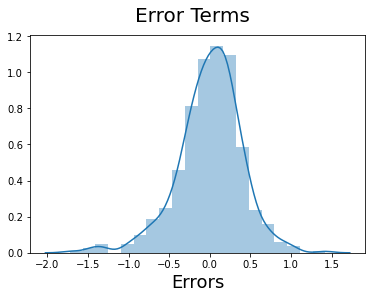

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms are fairly normally distributed and we can surely go ahead with this. Let's now make predictions on the test-set.

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [85]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [86]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [87]:
# Let's check the list 'col1' which had the 20 variables RFE had selected
col1

Index(['temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep', 'holiday_1',
       'weekday_Sat', 'weekday_Sun', 'workingday_1', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [88]:
# Let's subset these columns and create a new dataframe 'X_test_rfe'
X_test_rfe = X_test[col1]

In [89]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe = X_test_rfe.drop(['workingday_1', 'weekday_Sat', 'mnth_May', 'weekday_Sun','season_Spring', 'mnth_Nov', 'mnth_Dec', 'mnth_Feb'], axis = 1)

In [90]:
# Add a constant to the test set created
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   temp                   219 non-null    float64
 2   hum                    219 non-null    float64
 3   windspeed              219 non-null    float64
 4   season_Summer          219 non-null    uint8  
 5   season_Winter          219 non-null    uint8  
 6   yr_2019                219 non-null    uint8  
 7   mnth_Jan               219 non-null    uint8  
 8   mnth_Jul               219 non-null    uint8  
 9   mnth_Sep               219 non-null    uint8  
 10  holiday_1              219 non-null    uint8  
 11  weathersit_Light Snow  219 non-null    uint8  
 12  weathersit_Mist        219 non-null    uint8  
dtypes: float64(4), uint8(9)
memory usage: 10.5 KB


In [91]:
# Making predictions
y_pred = lm9.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

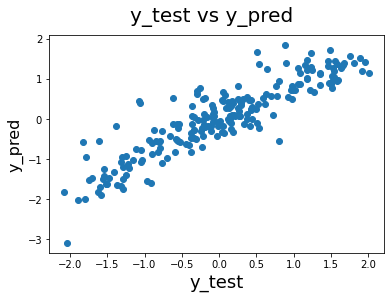

In [92]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared  value for the test set.

In [93]:
# r2_score for 12 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8029170032329543